In [44]:
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
inflation_path = 'Data/Global_Dataset_of_Inflation.csv'
inflation = pd.read_csv(inflation_path, encoding='ISO-8859-1')

In [46]:
inflation['Series Name'].unique()

array(['Headline Consumer Price Inflation',
       'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
       'Official Core Consumer Price Inflation',
       'Producer Price Inflation'], dtype=object)

In [47]:
food_inflation = inflation[inflation['Series Name'] == 'Food Consumer Price Inflation']
food_inflation

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
375,ABW,314.0,Aruba,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,12.820,10.990000,NaN,NaN,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN
376,AFG,512.0,Afghanistan,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,3.790,5.830000,NaN,NaN,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN
377,AGO,614.0,Angola,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,17.710,25.240000,23.90,24.70,"Food, Beverages and Tobacco",NaN,NaN,NaN,NaN,NaN
378,ALB,914.0,Albania,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,2.910,3.610000,3.90,11.42,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN
379,ARE,466.0,United Arab Emirates,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-1.390,3.700000,0.00,NaN,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,ZAF,199.0,South Africa,Inflation,Food Consumer Price Inflation,3.9,5.44,6.88,16.09,14.78,...,3.550,4.390000,6.10,8.97,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN
553,ZMB,754.0,Zambia,Inflation,Food Consumer Price Inflation,6.6,6.60,9.20,7.40,12.10,...,10.440,16.240000,27.71,15.68,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN
554,ZWE,698.0,Zimbabwe,Inflation,Food Consumer Price Inflation,3.2,2.50,5.00,3.40,10.70,...,86.120,601.020000,105.80,63.31,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN
555,VGB,284.0,British Virgin Islands,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,0.800,1.000000,3.20,NaN,Food and non-acoholic beverage,Additional countries,NaN,NaN,NaN,NaN


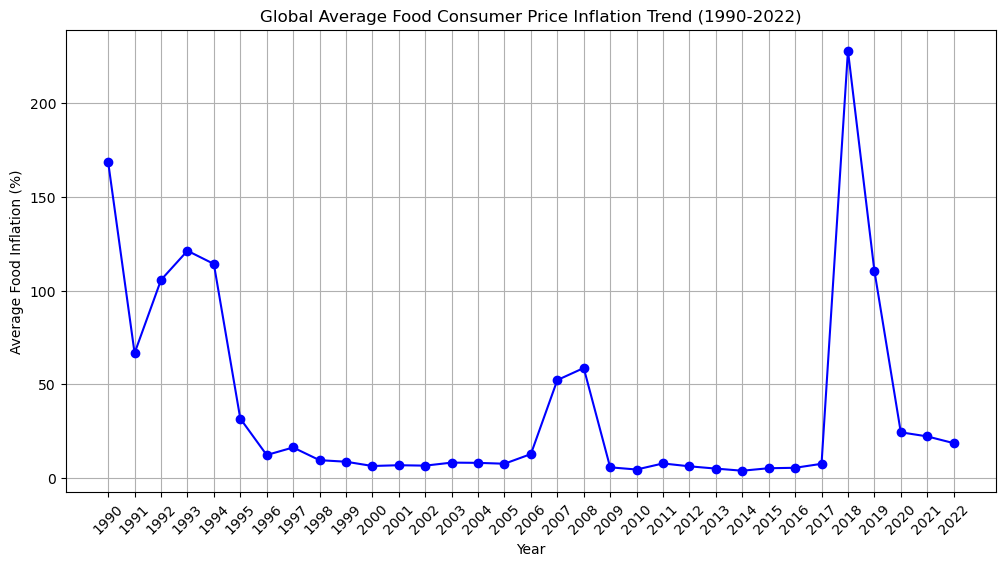

In [48]:

# Selecting years as columns for trend plotting (1990 - 2022)
years = [str(year) for year in range(1990, 2023)]
food_inflation_trends = food_inflation[years].transpose()

# Calculate the mean inflation for each year across all countries to visualize a global trend
mean_food_inflation = food_inflation_trends.mean(axis=1)

# Plotting the global average food inflation trend over time
plt.figure(figsize=(12, 6))
plt.plot(years, mean_food_inflation, marker='o', linestyle='-', color='b')
plt.title("Global Average Food Consumer Price Inflation Trend (1990-2022)")
plt.xlabel("Year")
plt.ylabel("Average Food Inflation (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [49]:

# Extract the years and inflation rates directly from spikes (using the index as the Year)
# Identify significant spikes where inflation rates are more than one standard deviation above the mean
spikes = mean_food_inflation[mean_food_inflation > mean_food_inflation.mean() + mean_food_inflation.std()]

spike_analysis = pd.DataFrame({
    'Year': spikes.index,
    'Inflation Rate': spikes.values
})
# Display the significant inflation spikes
spike_analysis

,Year,Inflation Rate
0,1990,168.519653
1,1992,105.647867
2,1993,121.227351
3,1994,114.186494
4,2018,228.071988
5,2019,110.636286


In [51]:
# Filter the data for only the spike years and identify max/min values by country for those years
food_inflation_spike_years = food_inflation[spikes.index]
max_spikes = food_inflation_spike_years.idxmax(axis=0)  # Get country with highest spike for each year
min_spikes = food_inflation_spike_years.idxmin(axis=0)  # Get country with lowest spike for each year

# Get the inflation rates for the highest and lowest countries in each spike year
max_spike_rates = food_inflation_spike_years.max(axis=0)
min_spike_rates = food_inflation_spike_years.min(axis=0)

# Combine results into a summary DataFrame
spike_country_analysis = pd.DataFrame({
    'Year': spikes.index,
    'Country with Highest Spike': food_inflation.loc[max_spikes, 'Country'].values,
    'Highest Inflation Rate': max_spike_rates.values,
    'Country with Lowest Spike': food_inflation.loc[min_spikes, 'Country'].values,
    'Lowest Inflation Rate': min_spike_rates.values
})

# Display the spike country analysis for review
spike_country_analysis.reset_index(drop=True, inplace=True)
spike_country_analysis

,Year,Country with Highest Spike,Highest Inflation Rate,Country with Lowest Spike,Lowest Inflation Rate
0,1990,Nicaragua,7296.60,Cameroon,-10.20
1,1992,Kazakhstan,2009.70,Gabon,-16.50
2,1993,Ukraine,5414.10,Sierra Leone,-34.40
3,1994,Armenia,4247.80,Seychelles,-7.10
4,2018,"Venezuela, RB",38386.00,Burundi,-10.99
5,2019,"Venezuela, RB",17710.79,Burkina Faso,-6.43


In [29]:
# Define the selected years
selected_years = ['1990', '1992', '1993', '1994', '2018', '2019']

# Extract the relevant columns (Country and selected years)
# Setting 'Country' as the index to work with the selected years only
food_inflation_selected_years = food_inflation[['Country'] + selected_years].set_index('Country')

# Set an inflation rate threshold to exclude outliers
inflation_threshold = 30000  # threshold for extreme outliers

# Find the top 3 countries with the lowest inflation for each selected year, excluding outliers
lowest_inflation_data = []

for year in selected_years:
    # Filter out countries with inflation rates exceeding the threshold
    valid_data = food_inflation_selected_years[year][food_inflation_selected_years[year] <= inflation_threshold]
    
    # Get the top 3 countries with the lowest inflation within the threshold
    countries = valid_data.nsmallest(3).index.tolist()
    rates = valid_data.nsmallest(3).values.tolist()
    for country, rate in zip(countries, rates):
        lowest_inflation_data.append({'Year': year, 'Country': country, 'Inflation Rate': rate})

# Create DataFrame with the filtered data
lowest_inflation = pd.DataFrame(lowest_inflation_data)
lowest_inflation

,Year,Country,Inflation Rate
0,1990,Cameroon,-10.20
1,1990,Dominica,-1.80
2,1990,Burkina Faso,-1.40
3,1992,Gabon,-16.50
4,1992,Mali,-9.90
5,1992,"Congo, Rep.",-8.10
6,1993,Sierra Leone,-34.40
7,1993,Qatar,-7.20
8,1993,Burkina Faso,-5.60
9,1994,Seychelles,-7.10


In [30]:
# Define the threshold to exclude outliers
inflation_threshold = 10000  # Example threshold to exclude extreme outliers

# Initialize list to store data
highest_inflation_data = []

for year in selected_years:
    # Filter out countries with inflation rates exceeding the threshold
    valid_data = food_inflation_selected_years[year][food_inflation_selected_years[year] <= inflation_threshold]
    
    # Get the top 3 countries with the highest inflation within the threshold
    countries = valid_data.nlargest(3).index.tolist()
    rates = valid_data.nlargest(3).values.tolist()
    for country, rate in zip(countries, rates):
        highest_inflation_data.append({'Year': year, 'Country': country, 'Inflation Rate': rate})

# Create DataFrame with the filtered data
highest_inflation = pd.DataFrame(highest_inflation_data)

# Display the result
highest_inflation

,Year,Country,Inflation Rate
0,1990,Nicaragua,7296.60
1,1990,Peru,7002.20
2,1990,Argentina,3086.50
3,1992,Kazakhstan,2009.70
4,1992,"Macedonia, FYR",1590.60
5,1992,Russian Federation,1589.60
6,1993,Ukraine,5414.10
7,1993,Brazil,1949.80
8,1993,Belarus,1415.10
9,1994,Armenia,4247.80


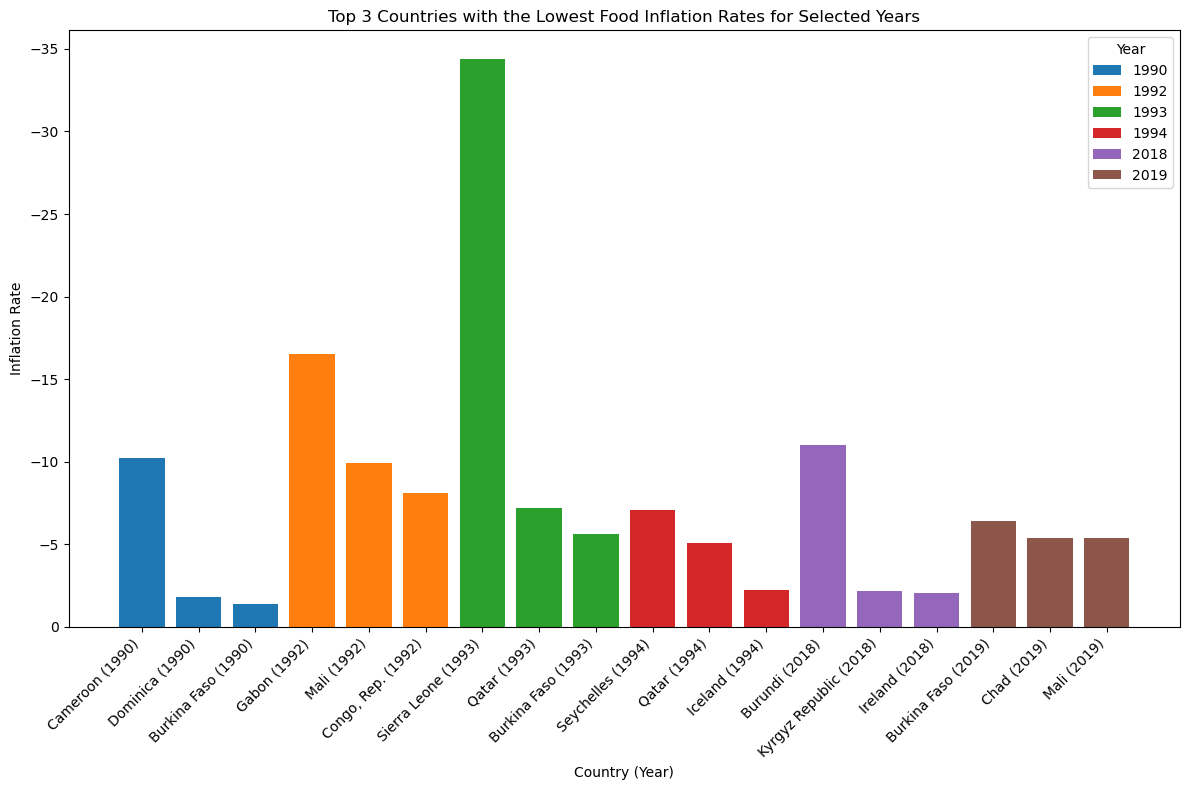

In [31]:
# Creating the bar chart with vertical orientation and aligned as buildings
plt.figure(figsize=(12, 8))
for year in selected_years:
    subset = lowest_inflation[lowest_inflation['Year'] == year]
    plt.bar(subset['Country'] + f" ({year})", subset['Inflation Rate'], label=year)

plt.xlabel('Country (Year)')
plt.ylabel('Inflation Rate')
plt.title('Top 3 Countries with the Lowest Food Inflation Rates for Selected Years')
plt.xticks(rotation=45,ha='right')
plt.gca().invert_yaxis()
plt.legend(title='Year')
plt.tight_layout()
plt.show()


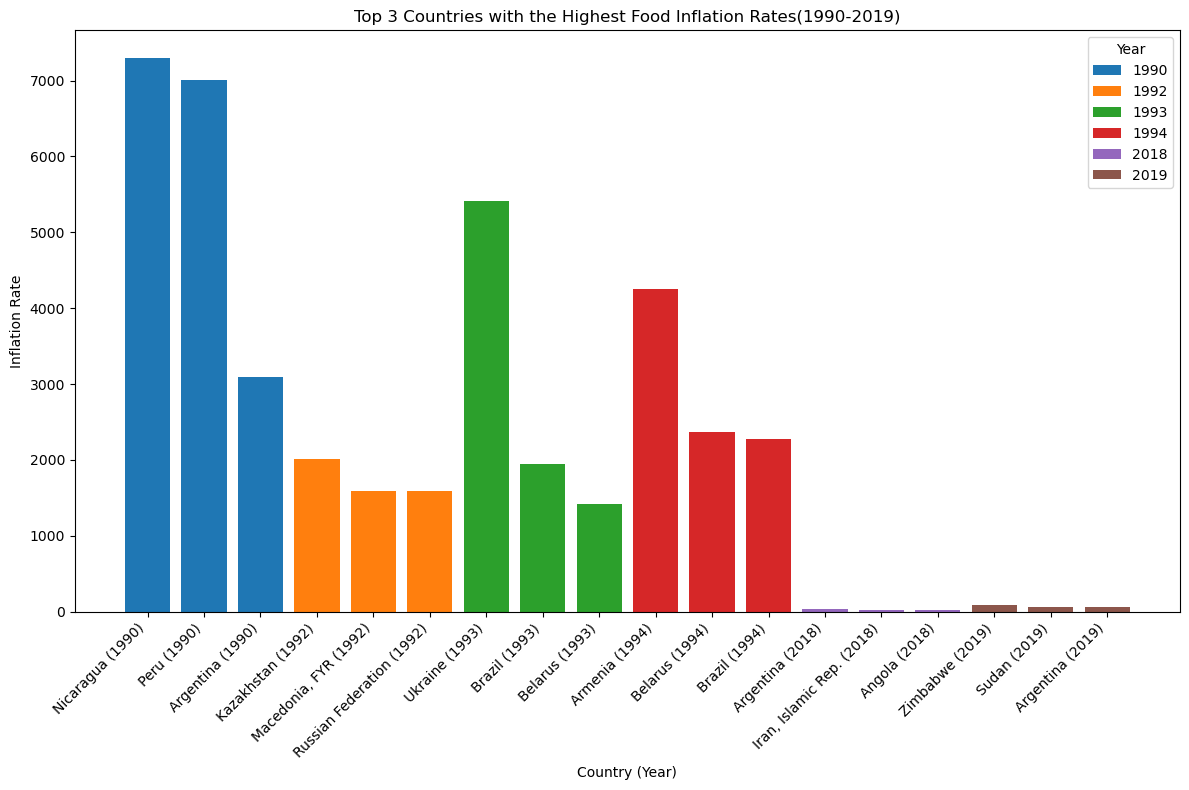

In [32]:
# Creating the bar chart with vertical orientation and aligned as buildings
plt.figure(figsize=(12, 8))
for year in selected_years:
    subset = highest_inflation[highest_inflation['Year'] == year]
    plt.bar(subset['Country'] + f" ({year})", subset['Inflation Rate'], label=year)

plt.xlabel('Country (Year)')
plt.ylabel('Inflation Rate')
plt.title('Top 3 Countries with the Highest Food Inflation Rates(1990-2019)')
plt.xticks(rotation=45,ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [33]:
food_csv = 'Data/food_price_indices_data_nov.csv'
food_file = pd.read_csv(food_csv, encoding='ISO-8859-1', skiprows=2)

# Drop columns with mostly NaN values (e.g., empty "Unnamed" columns)
food_file = food_file.dropna(axis=1, how='all')

# Display the first few rows of the cleaned data for readability
food_file.head()

,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar,Unnamed: 36,Unnamed: 65
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01,64.4,74.3,53.5,64.1,44.59,87.9,NaN,NaN
2,1990-02,64.7,76.8,52.2,62.2,44.50,90.7,NaN,NaN
3,1990-03,64.0,78.5,41.4,61.3,45.75,95.1,NaN,NaN
4,1990-04,66.0,81.2,48.4,62.8,44.02,94.3,NaN,NaN


In [34]:
food_file['Year'] = food_file['Date'].str[:4]

# Drop the original Date column as it is no longer needed
food_file = food_file.drop(columns=['Date'])

# Group the data by the Year column and calculate the mean for each year
food_file_annual = food_file.groupby('Year').mean(numeric_only=True)

# Transpose the resulting DataFrame for better readability
food_file_annual_transposed = food_file_annual.transpose().reset_index()
food_file_annual_transposed.columns = ['Attribute'] + list(food_file_annual_transposed.columns[1:])

# Display the resulting DataFrame
food_file_annual_transposed

,Attribute,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Food Price Index,63.308333,62.333333,64.225000,62.258333,67.266667,76.816667,77.816667,70.758333,64.816667,...,93.066667,91.958333,97.925000,95.741667,94.925000,98.058333,125.741667,144.516667,124.525000,120.950000
1,Meat,82.458333,81.475000,78.400000,75.025000,76.300000,85.250000,84.358333,79.316667,66.275000,...,96.791667,91.100000,97.475000,94.408333,99.466667,95.316667,107.541667,118.325000,114.108333,117.090000
2,Dairy,42.616667,45.466667,54.800000,48.608333,47.408333,62.708333,61.625000,59.441667,55.766667,...,87.141667,82.650000,108.016667,107.275000,102.808333,101.808333,119.600000,149.516667,123.733333,127.620000
3,Cereals,58.083333,57.866667,60.958333,59.025000,61.933333,70.850000,83.650000,66.525000,58.900000,...,95.875000,88.316667,90.983333,100.816667,96.600000,103.108333,131.141667,154.666667,130.883333,113.900000
4,Oils,45.471667,49.007500,52.993333,53.965833,71.867500,79.960000,69.935833,70.685000,83.886667,...,89.941667,99.443333,101.908333,87.760833,83.238333,99.442500,164.860000,187.766667,126.291667,133.070000
5,Sugar,77.700000,55.483333,56.025000,62.025000,74.950000,82.200000,73.991667,70.375000,55.225000,...,83.183333,111.616667,99.100000,77.400000,78.608333,79.508333,109.341667,114.458333,144.983333,126.300000
6,Unnamed: 36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.222500,NaN,NaN,NaN
7,Unnamed: 65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.232367,103.396130,106.429066,105.960101,101.794347,92.541187,103.699481,119.782428,117.080511,114.033848


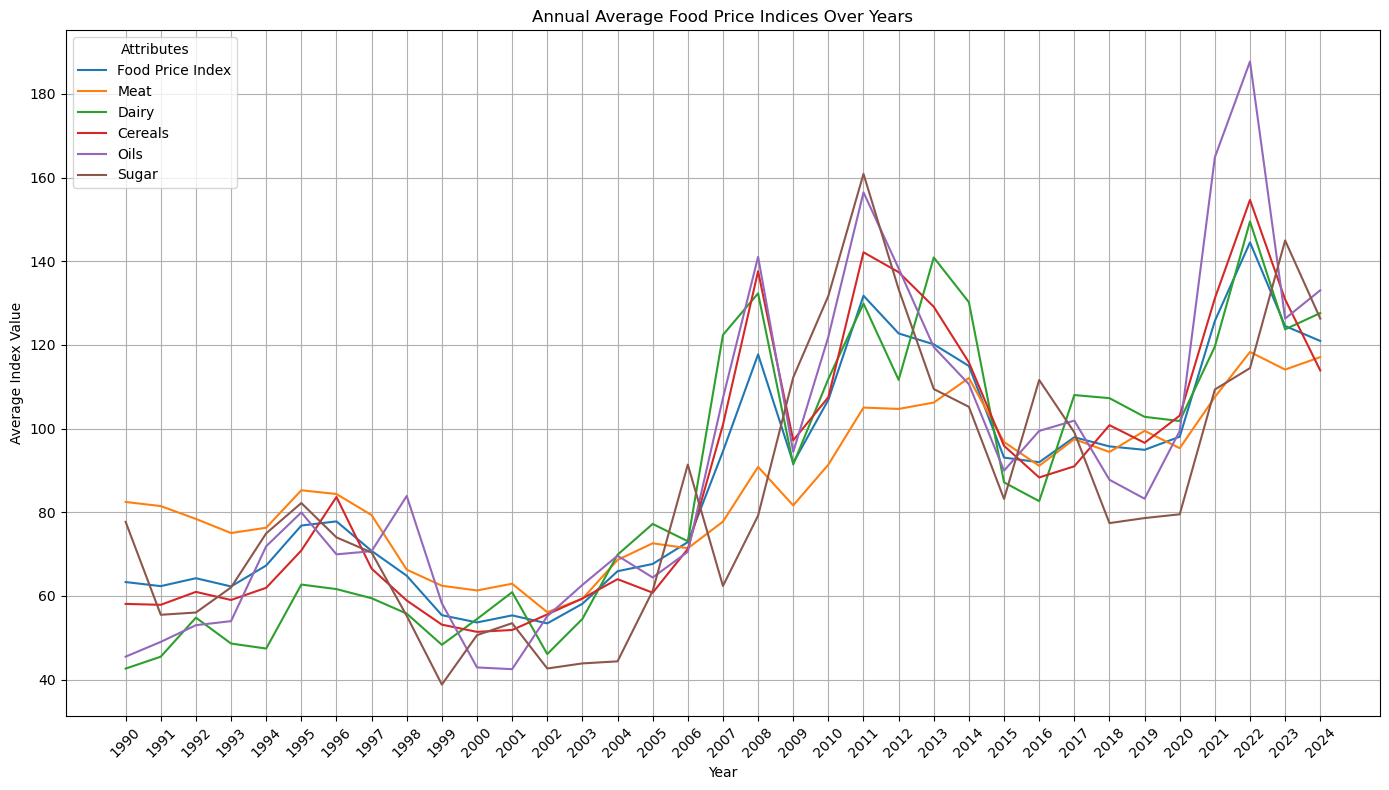

In [35]:

# Plotting the annual average values for key attributes to visualize trends over the years
# Selecting a few attributes for visualization due to space constraints

# Define attributes to visualize (e.g., Food Price Index, Meat, Dairy, Cereals, Oils, and Sugar)
attributes_to_plot = ['Food Price Index', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']

# Filter the data to include only these selected attributes
food_file_annual_selected = food_file_annual[attributes_to_plot]

# Plotting each attribute over the years
plt.figure(figsize=(14, 8))
for attribute in attributes_to_plot:
    plt.plot(food_file_annual_selected.index, food_file_annual_selected[attribute], label=attribute)

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Average Index Value")
plt.title("Annual Average Food Price Indices Over Years")
plt.legend(title="Attributes")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
metadata_file = 'Data/metadata-faostat-food-prices-for-united-states-of-america.csv'
metadata = pd.read_csv(metadata_file, encoding='ISO-8859-1')
metadata

,Field,Label,Value
0,id,Dataset ID,8bf31416-821e-41ad-bd35-2567d76227c4
1,title,Title of Dataset,United States of America - Food Prices
2,name,Dataset URL,faostat-food-prices-for-united-states-of-america
3,notes,Description,Food Prices for United States of America. Cont...
4,dataset_source,Source,FAOSTAT
...,...,...,...
75,resource_5_dataset_id,Dataset ID,8bf31416-821e-41ad-bd35-2567d76227c4
76,resource_5_resource_type,Resource Type,file.upload
77,resource_5_name,Resource Name,QuickCharts-Consumer Price Indices data for Un...
78,resource_5_mimetype,MIME Type,text/csv


In [37]:
producer_file ='Data/producer-prices_usa.csv'
producer = pd.read_csv(producer_file, encoding='ISO-8859-1')
producer.head


<bound method NDFrame.head of                 Iso3    StartDate     EndDate  Area Code Area Code (M49)  \
0      #country+code  #date+start   #date+end        NaN             NaN   
1                USA   1991-01-01  1991-12-31      231.0            '840   
2                USA   1992-01-01  1992-12-31      231.0            '840   
3                USA   1993-01-01  1993-12-31      231.0            '840   
4                USA   1994-01-01  1994-12-31      231.0            '840   
...              ...          ...         ...        ...             ...   
17557            USA   2018-01-01  2018-12-31      231.0            '840   
17558            USA   2019-01-01  2019-12-31      231.0            '840   
17559            USA   2020-01-01  2020-12-31      231.0            '840   
17560            USA   2021-01-01  2021-12-31      231.0            '840   
17561            USA   2022-01-01  2022-12-31      231.0            '840   

                           Area        Item Code Item Cod

In [38]:
producer_cleaned = producer.iloc[1:].reset_index(drop=True)
producer_cleaned.columns

Index(['Iso3', 'StartDate', 'EndDate', 'Area Code', 'Area Code (M49)', 'Area',
       'Item Code', 'Item Code (CPC)', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Months Code', 'Months', 'Unit', 'Value', 'Flag'],
      dtype='object')

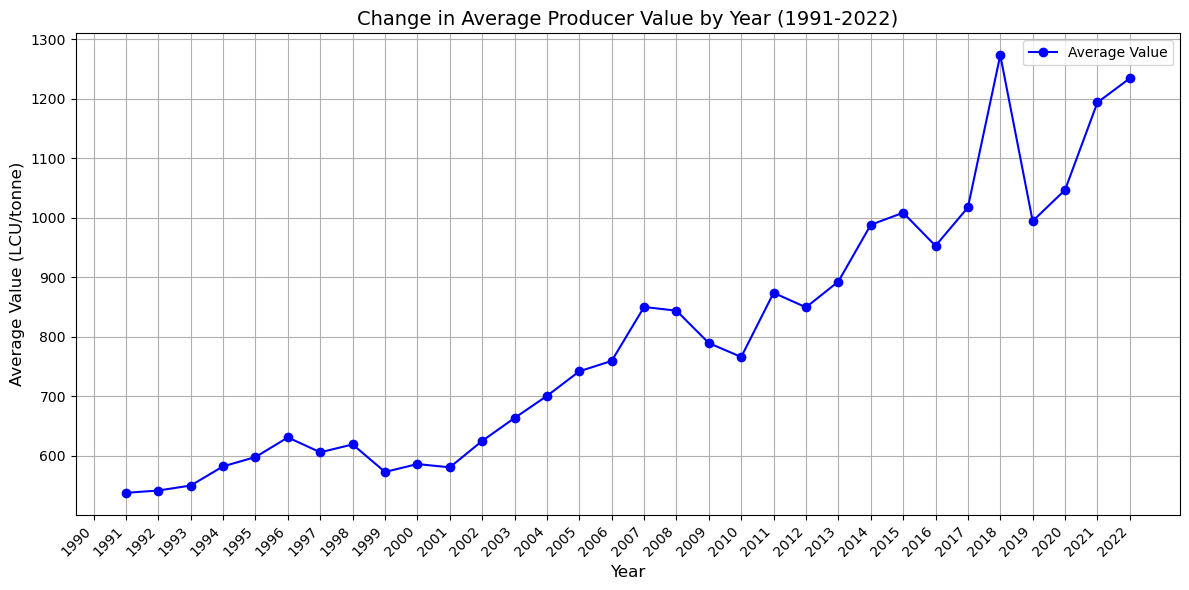

In [39]:
# Convert the 'Year' column to numeric, handling errors gracefully
producer_cleaned['Year'] = pd.to_numeric(producer_cleaned['Year'], errors='coerce')

# Convert the 'Value' column to numeric, handling errors gracefully
producer_cleaned['Value'] = pd.to_numeric(producer_cleaned['Value'], errors='coerce')

# Drop rows with NaN values in 'Year' or 'Value' columns
producer_cleaned = producer_cleaned.dropna(subset=['Year', 'Value'])

# Filter the data for the years 1991 to 2022
filtered_data = producer_cleaned[(producer_cleaned['Year'] >= 1991) & (producer_cleaned['Year'] <= 2022)]

# Group by year and calculate the average value across all items for each year
yearly_avg_values = filtered_data.groupby('Year')['Value'].mean()
years = range(1990, 2023)
# Plot the change in average value by year
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_values.index, yearly_avg_values.values, marker='o', color='blue', label='Average Value')

# Adding labels, title, and grid
plt.title("Change in Average Producer Value by Year (1991-2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Value (LCU/tonne)", fontsize=12)
plt.xticks(ticks=years, labels=years, rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


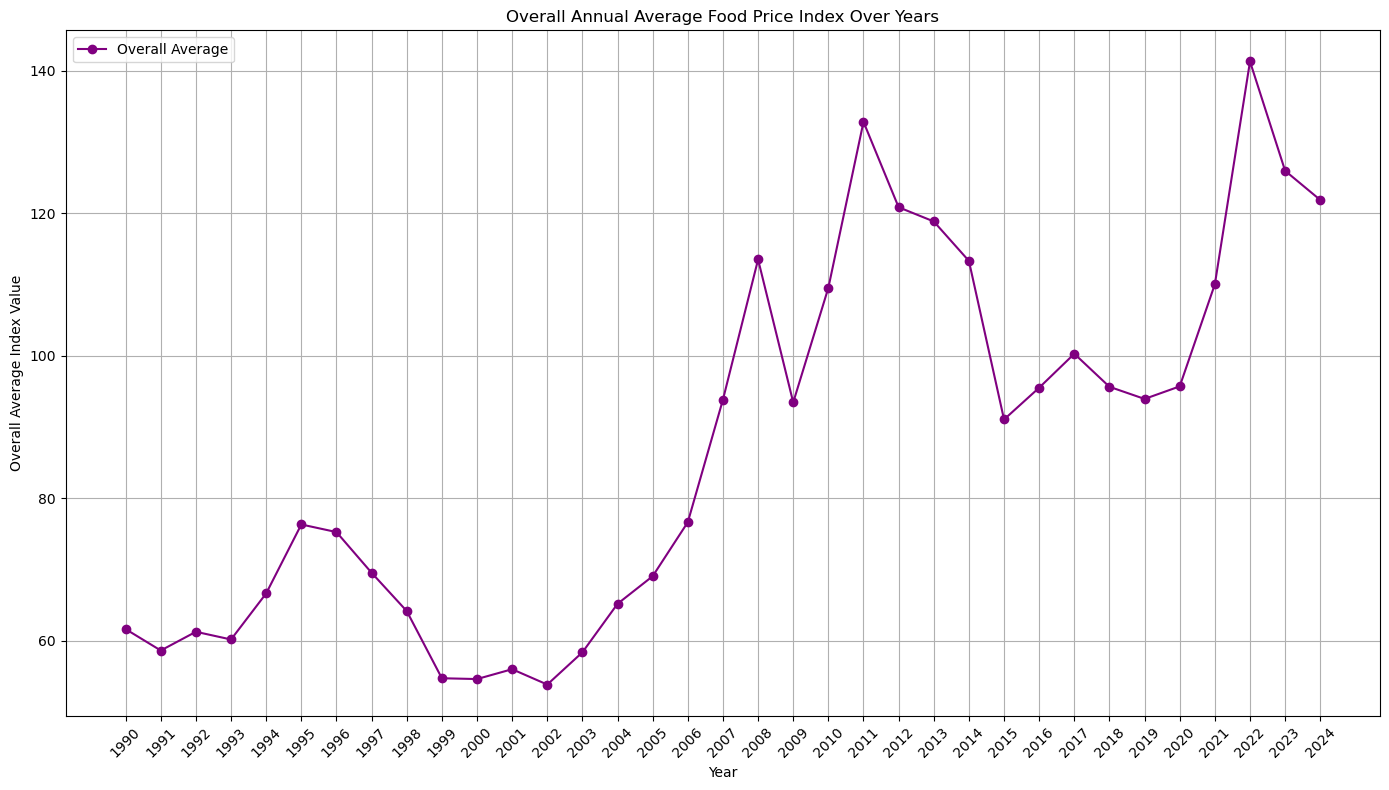

In [40]:
# Calculate the overall average of all attributes for each year
food_file_annual['Overall Average'] = food_file_annual.mean(axis=1)

# Plot the overall average trend over the years
plt.figure(figsize=(14, 8))
plt.plot(food_file_annual.index, food_file_annual['Overall Average'], label='Overall Average', color='purple', marker='o')

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Overall Average Index Value")
plt.title("Overall Annual Average Food Price Index Over Years")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


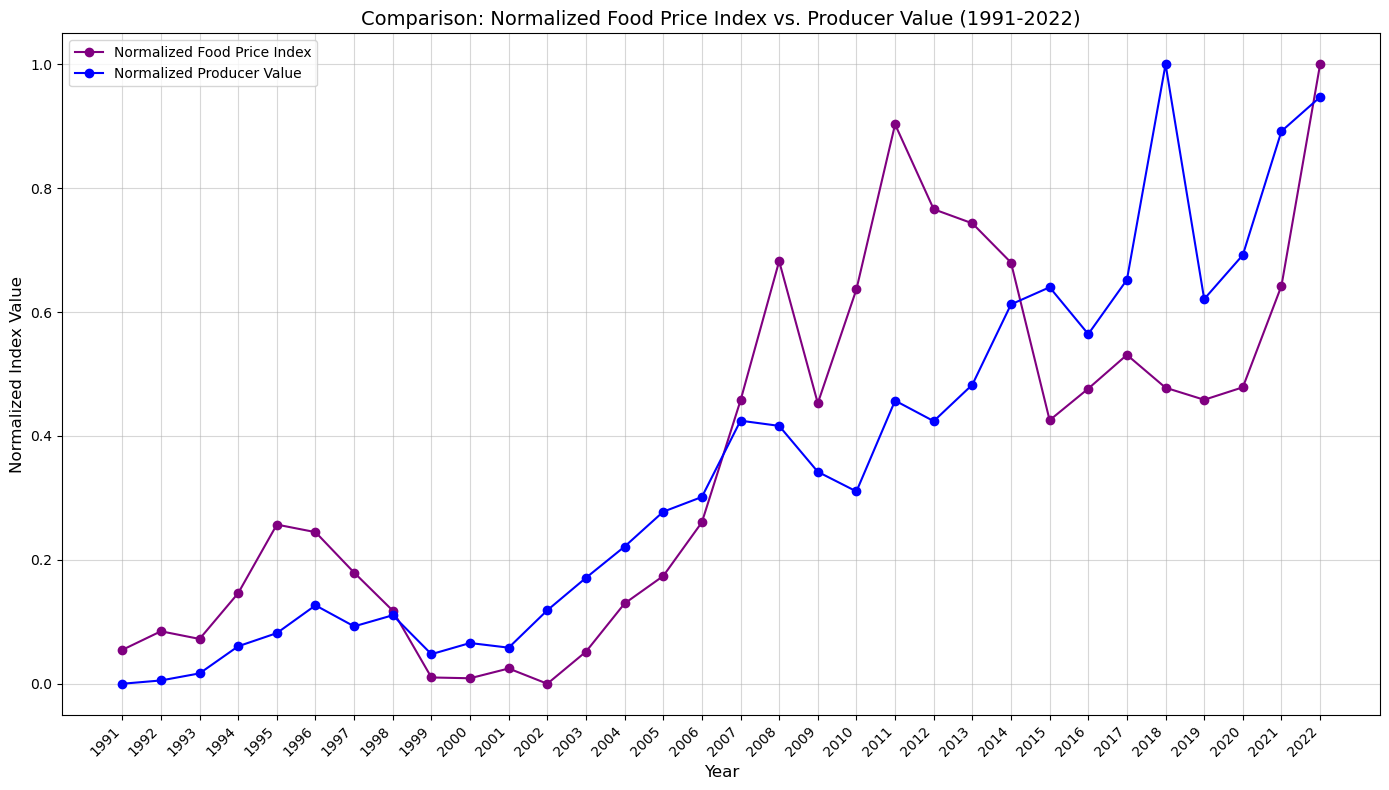

In [41]:
# Ensure indices are integers for both datasets
food_file_annual.index = food_file_annual.index.astype(int)
yearly_avg_values.index = yearly_avg_values.index.astype(int)

# Find the intersection of years
common_years = sorted(set(food_file_annual.index).intersection(yearly_avg_values.index))

# Filter both datasets for the common years
normalized_food_price_index = (food_file_annual.loc[common_years, 'Overall Average'] - food_file_annual.loc[common_years, 'Overall Average'].min()) / (
    food_file_annual.loc[common_years, 'Overall Average'].max() - food_file_annual.loc[common_years, 'Overall Average'].min()
)

normalized_producer_values = (yearly_avg_values.loc[common_years] - yearly_avg_values.loc[common_years].min()) / (
    yearly_avg_values.loc[common_years].max() - yearly_avg_values.loc[common_years].min()
)

# Plot the updated comparison chart
plt.figure(figsize=(14, 8))

# Plot normalized Overall Annual Average Food Price Index
plt.plot(common_years, normalized_food_price_index, label='Normalized Food Price Index', color='purple', marker='o')

# Plot normalized Change in Average Producer Value by Year
plt.plot(common_years, normalized_producer_values, label='Normalized Producer Value', color='blue', marker='o')

# Adding labels, title, and legend
plt.title("Comparison: Normalized Food Price Index vs. Producer Value (1991-2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Normalized Index Value", fontsize=12)
plt.xticks(ticks=common_years, labels=common_years, rotation=45, ha='right')
plt.grid(True, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
